In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Smart_Farming_Crop_Yield_2024.csv')

In [15]:
df.columns

Index(['region', 'crop_type', 'soil_moisture_%', 'soil_pH', 'temperature_C',
       'rainfall_mm', 'humidity_%', 'sunlight_hours', 'irrigation_type',
       'fertilizer_type', 'pesticide_usage_ml', 'total_days',
       'yield_kg_per_hectare', 'latitude', 'longitude', 'NDVI_index',
       'crop_disease_status', 'yield_class'],
      dtype='object')

In [16]:
df.dtypes

region                    int64
crop_type                 int64
soil_moisture_%         float64
soil_pH                 float64
temperature_C           float64
rainfall_mm             float64
humidity_%              float64
sunlight_hours          float64
irrigation_type           int64
fertilizer_type           int64
pesticide_usage_ml      float64
total_days                int64
yield_kg_per_hectare    float64
latitude                float64
longitude               float64
NDVI_index              float64
crop_disease_status       int64
yield_class              object
dtype: object

In [3]:
df = df.drop(columns=['farm_id', 'sensor_id', 'timestamp', 'sowing_date', 'harvest_date'])


In [4]:
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [5]:
X = df.drop('yield_kg_per_hectare', axis=1)
y = df['yield_kg_per_hectare']

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [8]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 1228.70
MAE: 1076.62
R²: -0.09


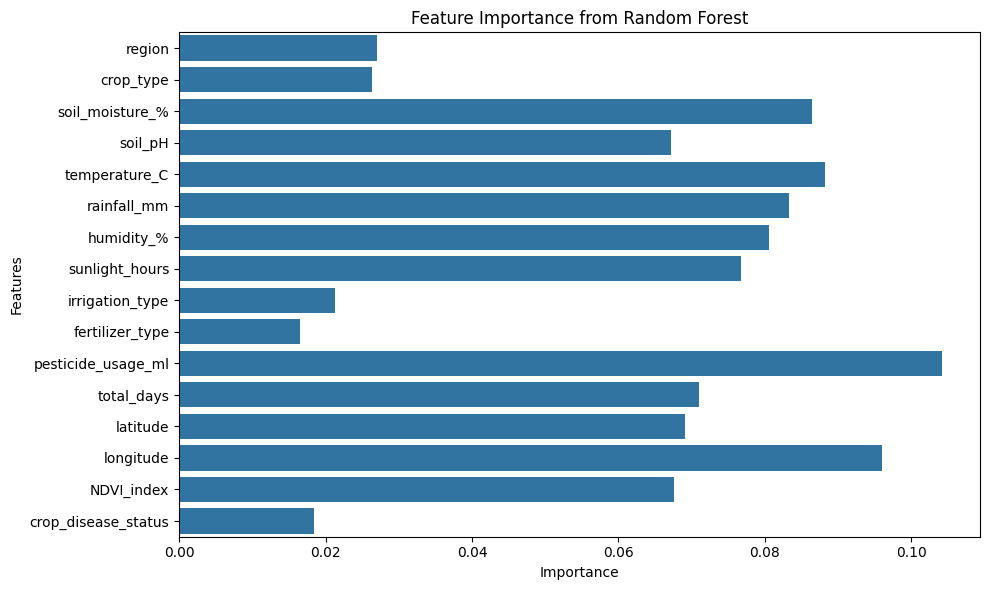

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


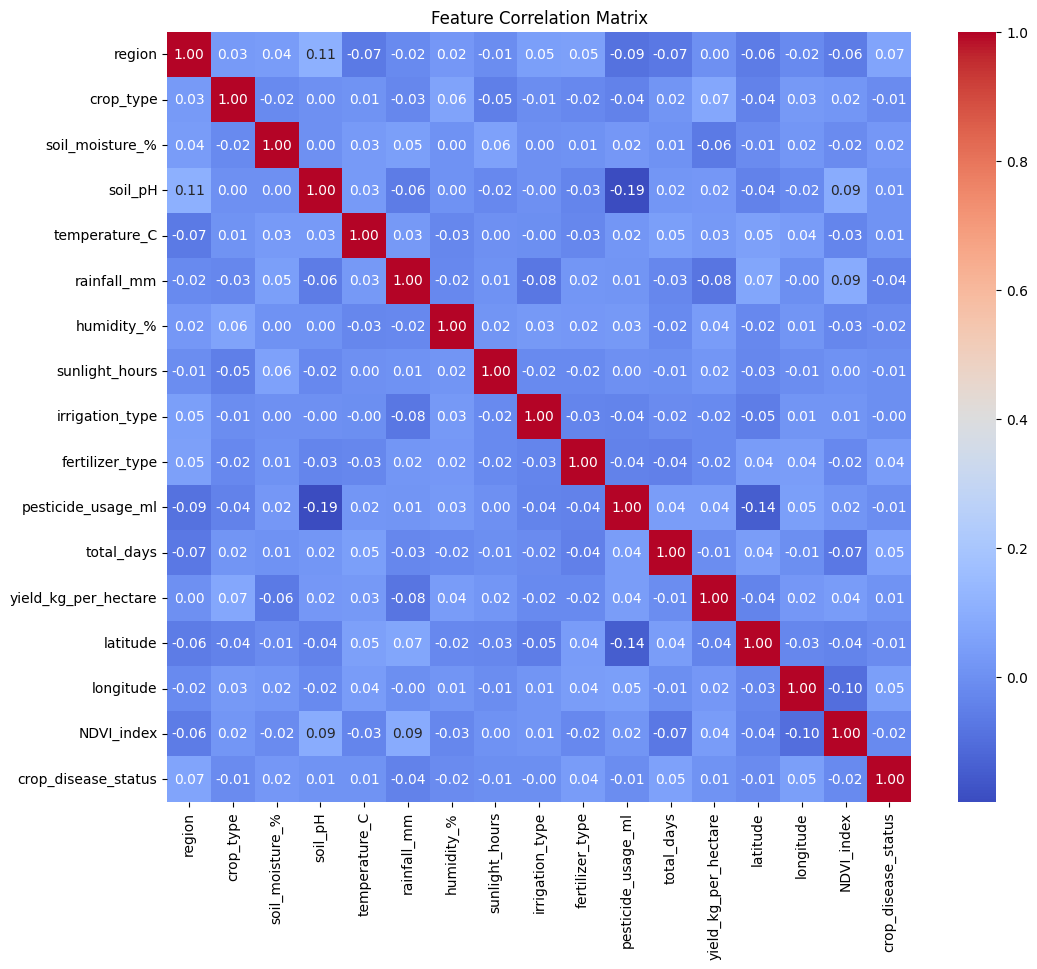

In [17]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [12]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
print(f"Cross-validated R² scores: {cv_scores}")
print(f"Average R² score: {cv_scores.mean():.2f}")

Cross-validated R² scores: [-0.09133811 -0.08605533 -0.0596034  -0.10256949 -0.11180156]
Average R² score: -0.09
